# Examples of kernel functions

In [1]:
%matplotlib inline

In [2]:
import kickscore as ks
import numpy as np
import matplotlib.pyplot as plt

from kseval.plotting import sigconf_settings

In [3]:
sigconf_settings()

Sigconf settings loaded!


In [4]:
ts = np.linspace(0, 10, num=80)

def sample_and_plot(ax, kernel, name):
    xs = kernel.simulate(ts)
    ax.plot(ts, xs, linewidth=1.0)
    ax.grid(axis="y", alpha=0.5, linewidth=0.5)
    ax.set_title(name)
    ax.set_ylim(ymin=-4, ymax=4)
    #ax.set_frame_on(False)
    #ax.set_yticks([0, 5, 10], [0, 5, 10])

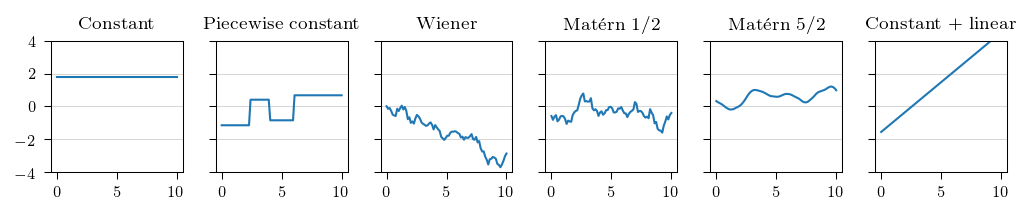

In [5]:
fig, axs = plt.subplots(ncols=6, figsize=(7.0, 1.5), sharey=True, sharex=True)
np.random.seed(0)

sample_and_plot(axs[0],
        ks.kernel.Constant(var=1.0),
        "Constant")

sample_and_plot(axs[1],
        ks.kernel.PiecewiseConstant(var=1.0, bounds=[2.3, 4, 6]),
        "Piecewise constant")

sample_and_plot(axs[5],
        ks.kernel.Affine(var_offset=10.0, t0=0.0, var_slope=0.1),
        "Constant + linear")

sample_and_plot(axs[2],
        ks.kernel.Wiener(var=0.3, t0=0.0, var_t0=0.0),
        "Wiener")

sample_and_plot(axs[3],
        ks.kernel.Exponential(var=1.0, lscale=5.0),
        "Matérn 1/2")

sample_and_plot(axs[4],
        ks.kernel.Matern52(var=1.0, lscale=2.0),
        "Matérn 5/2")

fig.tight_layout()
fig.subplots_adjust(wspace=0.25)
fig.savefig("covariances.pdf", bbox_inches="tight")